# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Ciencia y analítica de datos**
### Tecnológico de Monterrey
### Dra. María de la Paz Rico Fernández
### Dr. Juan Miguel Meza Méndez

### **David Valles A01191310**`

https://www.gob.mx/conagua/articulos/calidad-del-agua

# Limpieza, análisis, visualización y agrupamiento.


In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 19.4 MB/s 
     |████████████████████████████████| 1.0 MB 57.6 MB/s 
     |████████████████████████████████| 1.7 MB 34.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 37.8 MB/s 
     |████████████████████████████████| 6.3 MB 22.0 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=132195d0afb8a4edfa764035d0ba457c7e10fab85fce605a9b2819c3118b8a62
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=9d6684d78aa930d7e20af6391bdaaddaa36689abd19d2c2d331334eeb8cce3d4
  Stored in directory: /root/

In [ ]:
#Importamos Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Cargamos datos en un DF
path = 'sample_data/agua_subterranea.csv'
df = pd.read_csv(path)

# Limpieza de datos

In [ ]:
#Concluimos que la base de datos tiene 1068 entradas(Rows) y 57 featuree(Cols)
print(df.shape)
df.head()

(1068, 57)


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
#Lista los nombres de las columnas
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [ ]:
#Conteo de nulos
df.isnull().sum().sum()

1532

In [ ]:
df.isna().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [ ]:
#Imprime tipo de datos
print(df.dtypes)


CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

Importantes para determinar semaforo: Demanda Bioquímica de Oxígeno a cinco días (DBO5), Demanda Química de Oxígeno (DQO), Sólidos Suspendidos Totales (SST), Coliformes Fecales (CF), Escherichia coli, (E_COLI), Enterococos (ENTEROC), Porcentaje de Saturación de Oxigeno (OD%) y Toxicidad (TOX).



In [ ]:
#Removemos variables innecesarias 
df.drop('CLAVE', axis = 1, inplace = True)
df.drop('PERIODO', axis = 1, inplace = True)

In [ ]:
#Remueve toda la columna SDT_mg/L sin valores, y contaminantes
df.drop('SDT_mg/L', inplace=True, axis=1)
df.drop('CONTAMINANTES', inplace=True, axis=1)



De los 1068 datos tenemos una columna (SDT_mg/L) con todos sus valores vacios y una columna (CONTAMINANTES) con 434 nulos. 



La columna CONTAMINANTES continene un objeto con un string que representa una lista de sustancias en el agua. Considero que esta informacion no es relevante, ya que contamos con otras columnas de las cuales podemos derivar esta informacion.


In [ ]:
#Remueve filas con valores nulos de las variables numericas.
df.dropna(subset=["ALC_mg/L"], axis=0, inplace=True)
df.dropna(subset=["CALIDAD_CONDUC"], axis=0, inplace=True)
df.dropna(subset=["SDT_M_mg/L"], axis=0, inplace=True)


In [ ]:
df.dropna(subset=["DUR_mg/L"], axis=0, inplace=True)
df.dropna(subset=["CALIDAD_DUR"], axis=0, inplace=True)
df.dropna(subset=["N_NO3_mg/L"], axis=0, inplace=True)
df.dropna(subset=["CALIDAD_N_NO3"], axis=0, inplace=True)

In [ ]:
df.isna().sum()

SITIO                   0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
ALC_mg/L                0
CALIDAD_ALC             0
CONDUCT_mS/cm           0
CALIDAD_CONDUC          0
SDT_M_mg/L              0
CALIDAD_SDT_ra          0
CALIDAD_SDT_salin       0
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                0
CALIDAD_DUR             0
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              0
CALIDAD_N_NO3           0
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE              0
SEMAFORO                0
CUMPLE_CON_A

In [ ]:
#Remueve '< y >' ademas de covertir a float.
to_float = [
  'SDT_M_mg/L',
  'FLUORUROS_mg/L',
  'DUR_mg/L',
  'COLI_FEC_NMP/100_mL',
  'N_NO3_mg/L',
  'AS_TOT_mg/L',
  'CD_TOT_mg/L',
  'CR_TOT_mg/L',
  'HG_TOT_mg/L',
  'PB_TOT_mg/L',
  'MN_TOT_mg/L',
  'FE_TOT_mg/L']

for var in to_float:
  df_string = df[var]
  for index in df_string.index:
      s = df_string[index]
      s = str(s)
      s = s.replace('>', '')
      s = s.replace('<', '')
      df_string[index] = s
  df[var] = df_string.astype("float")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
Y_SEMAFORO = df['SEMAFORO']
print(Y_SEMAFORO)

0       Verde
1       Verde
2        Rojo
3       Verde
4        Rojo
        ...  
1063     Rojo
1064     Rojo
1065     Rojo
1066    Verde
1067    Verde
Name: SEMAFORO, Length: 1054, dtype: object


In [ ]:
variables_categoricas = [
  'SITIO',
  'SUBTIPO',
  'CALIDAD_ALC',
  'CALIDAD_CONDUC',
  'CALIDAD_SDT_ra', 
  'CALIDAD_SDT_salin',
  'CALIDAD_FLUO',
  'CALIDAD_DUR',   
  'CALIDAD_COLI_FEC', 
  'CALIDAD_N_NO3',
  'CALIDAD_AS',
  'CALIDAD_CD',
  'CALIDAD_CR',
  'CALIDAD_HG',
  'CALIDAD_PB',
  'CALIDAD_FE',
  'CALIDAD_MN',
  "CUMPLE_CON_ALC",   
  "CUMPLE_CON_COND",       
  "CUMPLE_CON_SDT_ra",   
  "CUMPLE_CON_SDT_salin",  
  "CUMPLE_CON_FLUO",  
  "CUMPLE_CON_DUR",    
  "CUMPLE_CON_CF",     
  "CUMPLE_CON_NO3",        
  "CUMPLE_CON_AS",     
  "CUMPLE_CON_CD",       
  "CUMPLE_CON_CR",       
  "CUMPLE_CON_HG",       
  "CUMPLE_CON_PB",       
  "CUMPLE_CON_MN",       
  "CUMPLE_CON_FE",
  "ORGANISMO_DE_CUENCA",
  "ESTADO",
  "MUNICIPIO",
  "ACUIFERO",
  'SEMAFORO'
]
 
le = LabelEncoder()
for var in variables_categoricas:
  label = le.fit_transform(df[var])
  df[var] = label

In [ ]:
df.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,843,6,0,25,232,5,-102.02210,22.20887,229.990,0,...,1,1,1,1,1,1,1,1,1,1
1,807,6,0,9,232,5,-102.20075,21.99958,231.990,0,...,1,1,1,1,1,1,1,1,1,1
2,587,6,0,94,228,5,-102.28801,22.36685,204.920,0,...,1,1,1,0,1,1,1,1,1,1
3,648,6,0,284,228,5,-102.29449,22.18435,327.000,0,...,1,1,1,1,1,1,1,1,1,1
4,927,10,2,197,220,5,-110.24480,23.45138,309.885,0,...,1,1,0,1,1,1,1,1,1,1


In [ ]:
"""
otro modo de cambiar variables binarias
categoricas_binarias = [
  "CUMPLE_CON_ALC",   
  "CUMPLE_CON_COND",       
  "CUMPLE_CON_SDT_ra",   
  "CUMPLE_CON_SDT_salin",  
  "CUMPLE_CON_FLUO",  
  "CUMPLE_CON_DUR",    
  "CUMPLE_CON_CF",     
  "CUMPLE_CON_NO3",        
  "CUMPLE_CON_AS",     
  "CUMPLE_CON_CD",       
  "CUMPLE_CON_CR",       
  "CUMPLE_CON_HG",       
  "CUMPLE_CON_PB",       
  "CUMPLE_CON_MN",       
  "CUMPLE_CON_FE"]


for feature in categoricas_binarias:
  df[feature].replace(['NO', 'SI'],
                        [0, 1], inplace=True)
"""

'\notro modo de cambiar variables binarias\ncategoricas_binarias = [\n  "CUMPLE_CON_ALC",   \n  "CUMPLE_CON_COND",       \n  "CUMPLE_CON_SDT_ra",   \n  "CUMPLE_CON_SDT_salin",  \n  "CUMPLE_CON_FLUO",  \n  "CUMPLE_CON_DUR",    \n  "CUMPLE_CON_CF",     \n  "CUMPLE_CON_NO3",        \n  "CUMPLE_CON_AS",     \n  "CUMPLE_CON_CD",       \n  "CUMPLE_CON_CR",       \n  "CUMPLE_CON_HG",       \n  "CUMPLE_CON_PB",       \n  "CUMPLE_CON_MN",       \n  "CUMPLE_CON_FE"]\n\n\nfor feature in categoricas_binarias:\n  df[feature].replace([\'NO\', \'SI\'],\n                        [0, 1], inplace=True)\n'

# Analisis de datos

Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
Identificando tendencias centrales promedio, media y mediana de los datos. 
Identificar medidas de dispersión, máximo, mínimo .
Identificar medidas de posición no centrales , los cuartiles , outliers.   
Identificar correlaciones.
Preparar los datos 

In [ ]:
#MEAN MG
avg_ALC = df["ALC_mg/L"].astype("float").mean()
print("Average of ALC_mg/L: ", avg_ALC)

Average of ALC_mg/L:  234.69526565464895


In [ ]:
#MEAN MS conduct
avg_CONDUCT = df["CONDUCT_mS/cm"].astype("float").mean()
print("Average of CONDUCT_mS/cm: ", avg_CONDUCT)

Average of CONDUCT_mS/cm:  1142.7264705882355


In [ ]:
# Aqui podemos identificar tendencias y medidas como: promedio, media, mediana, cuartiles, outliers y dispersion
df.describe()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,...,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,525.483871,5.942125,16.446869,217.754269,143.910816,4.945920,-101.848270,23.161796,234.695266,0.653700,...,0.786528,0.942125,0.924099,0.881404,0.998102,0.985769,0.999051,0.988615,0.919355,0.872865
std,304.010304,3.708447,9.985865,121.292569,74.386861,0.437898,6.697568,3.875005,111.147849,1.176132,...,0.409953,0.233617,0.264966,0.323466,0.043540,0.118500,0.030802,0.106143,0.272419,0.333282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-116.664250,14.561150,26.640000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,262.250000,2.000000,9.000000,124.250000,88.000000,5.000000,-105.385170,20.224857,164.257500,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,525.500000,6.000000,15.000000,212.000000,153.000000,5.000000,-102.170665,22.640705,215.825000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,788.750000,10.000000,25.000000,312.000000,203.750000,5.000000,-98.971268,25.508770,292.930000,0.750000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1051.000000,12.000000,31.000000,446.000000,271.000000,7.000000,-86.864120,32.677713,1650.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#MEAN
df.mean()

SITIO                    525.483871
ORGANISMO_DE_CUENCA        5.942125
ESTADO                    16.446869
MUNICIPIO                217.754269
ACUIFERO                 143.910816
SUBTIPO                    4.945920
LONGITUD                -101.848270
LATITUD                   23.161796
ALC_mg/L                 234.695266
CALIDAD_ALC                0.653700
CONDUCT_mS/cm           1142.726471
CALIDAD_CONDUC             2.035104
SDT_M_mg/L               896.945797
CALIDAD_SDT_ra             1.850095
CALIDAD_SDT_salin          0.980076
FLUORUROS_mg/L             1.078547
CALIDAD_FLUO               1.448767
DUR_mg/L                 349.893584
CALIDAD_DUR                1.117647
COLI_FEC_NMP/100_mL      359.734156
CALIDAD_COLI_FEC           3.091082
N_NO3_mg/L                 4.321651
CALIDAD_N_NO3              1.664137
AS_TOT_mg/L                0.019504
CALIDAD_AS                 1.646110
CD_TOT_mg/L                0.003030
CALIDAD_CD                 0.998102
CR_TOT_mg/L                0

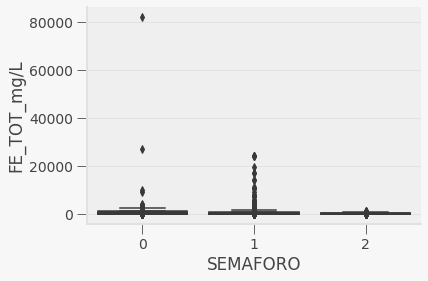

In [ ]:
for key in to_float:
  if key != 'SEMAFORO':
    df_b =df[[key, 'SEMAFORO']]
    sns.boxplot(x="SEMAFORO", y=key, data=df_b)

In [ ]:
Y = df[['SEMAFORO']]

In [ ]:
Y.describe()

,SEMAFORO
count,1054.000000
mean,1.172676
std,0.779956
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [ ]:
#Creamos un nuevo DF con latitud y longitud para generar una nueva columna de coordenadas
latlong=df[["LONGITUD","LATITUD"]]

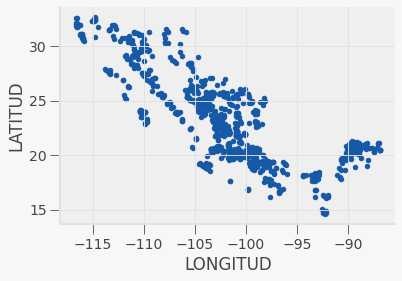

In [ ]:
latlong.plot.scatter( "LONGITUD","LATITUD")

In [ ]:
# Pearson correlation matrix
df.corr()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
SITIO,1.000000,-0.104419,-0.160897,0.194797,0.107810,0.102657,-0.053179,-0.039316,0.019035,0.016232,...,0.030661,0.038797,-0.020776,0.006407,0.038238,0.000824,0.021549,0.025569,-0.049478,0.061916
ORGANISMO_DE_CUENCA,-0.104419,1.000000,-0.070003,-0.197979,0.097086,-0.072690,0.010526,0.254783,0.045062,-0.085378,...,-0.191160,-0.053197,0.010989,0.095608,0.040490,-0.025647,0.016146,0.085179,-0.007444,-0.029010
ESTADO,-0.160897,-0.070003,1.000000,0.110944,-0.103957,-0.058535,0.299144,-0.108833,0.061643,-0.112952,...,0.029356,0.108796,0.106509,0.124029,0.012873,-0.022709,-0.010970,0.009284,0.004184,0.025076
MUNICIPIO,0.194797,-0.197979,0.110944,1.000000,0.106145,0.029734,0.089644,-0.128208,0.008674,0.061194,...,0.014700,0.084457,-0.037104,0.020000,0.031021,-0.018546,-0.057763,0.003397,-0.043482,-0.028166
ACUIFERO,0.107810,0.097086,-0.103957,0.106145,1.000000,0.019997,-0.063820,0.062789,0.061280,0.044933,...,0.003579,0.053640,0.040563,-0.014570,0.014608,-0.039898,-0.042313,0.029460,-0.077165,0.009578
SUBTIPO,0.102657,-0.072690,-0.058535,0.029734,0.019997,1.000000,-0.155679,0.106938,-0.057146,0.039203,...,0.067883,0.062207,-0.035411,-0.045323,-0.005387,-0.014846,-0.003808,-0.013259,-0.020673,0.011409
LONGITUD,-0.053179,0.010526,0.299144,0.089644,-0.063820,-0.155679,1.000000,-0.759172,0.171424,-0.060110,...,-0.157083,0.110280,0.114970,0.136779,-0.034010,-0.079481,-0.021185,-0.011930,0.089533,-0.007678
LATITUD,-0.039316,0.254783,-0.108833,-0.128208,0.062789,0.106938,-0.759172,1.000000,-0.073635,-0.065809,...,-0.052171,-0.021588,-0.129056,-0.158049,0.036260,0.122346,0.038340,0.070188,0.029289,0.045806
ALC_mg/L,0.019035,0.045062,0.061643,0.008674,0.061280,-0.057146,0.171424,-0.073635,1.000000,-0.264873,...,-0.257816,-0.011728,-0.035406,-0.031073,-0.010754,0.012585,-0.033649,-0.042648,-0.150258,-0.045095
CALIDAD_ALC,0.016232,-0.085378,-0.112952,0.061194,0.044933,0.039203,-0.060110,-0.065809,-0.264873,1.000000,...,0.112431,0.079065,-0.008240,-0.020688,0.024246,0.025930,0.017136,0.036852,-0.007219,-0.085775


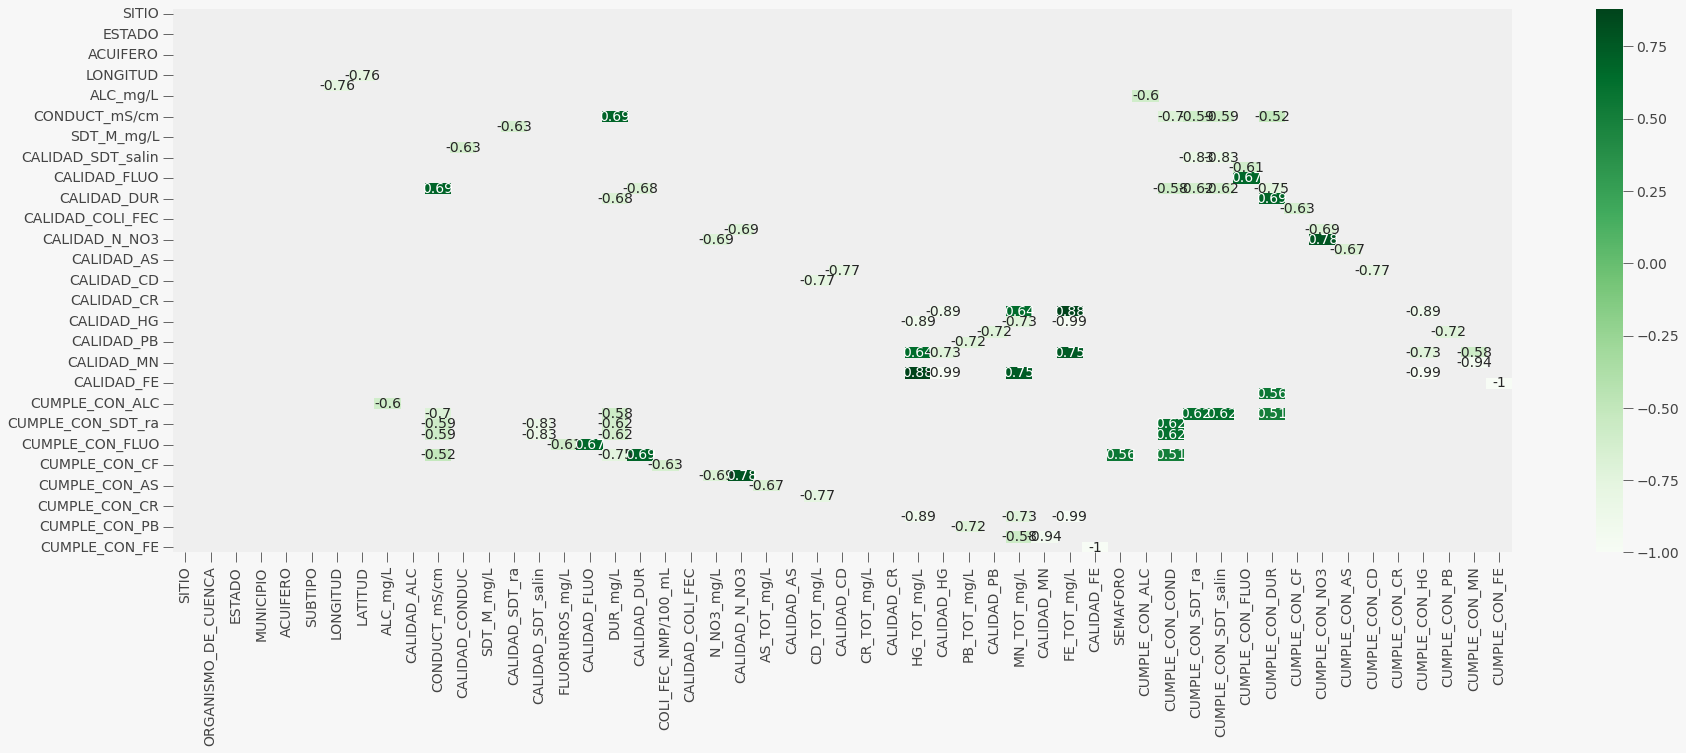

In [ ]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Greens")
plt.show()

In [ ]:
""" PCA PARA LA SIGUIENTE ETAPA?"
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_agua = pca.fit_transform(df)

pca_df = pd.DataFrame(data=pca_agua, columns=['Componente 1', 'Componente 2'])
"""

# Visualización

In [ ]:
df["COLOR"] = Y_SEMAFORO
df["COLOR"]

0       Verde
1       Verde
2        Rojo
3       Verde
4        Rojo
        ...  
1063     Rojo
1064     Rojo
1065     Rojo
1066    Verde
1067    Verde
Name: COLOR, Length: 1054, dtype: object

In [ ]:
df["Coordinates"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,...,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,COLOR,Coordinates
0,843,6,0,25,232,5,-102.02210,22.20887,229.990,0,...,1,1,1,1,1,1,1,1,Verde,POINT (-102.0221 22.20887)
1,807,6,0,9,232,5,-102.20075,21.99958,231.990,0,...,1,1,1,1,1,1,1,1,Verde,POINT (-102.20075 21.99958)
2,587,6,0,94,228,5,-102.28801,22.36685,204.920,0,...,1,0,1,1,1,1,1,1,Rojo,POINT (-102.28801 22.36685)
3,648,6,0,284,228,5,-102.29449,22.18435,327.000,0,...,1,1,1,1,1,1,1,1,Verde,POINT (-102.29449 22.18435)
4,927,10,2,197,220,5,-110.24480,23.45138,309.885,0,...,0,1,1,1,1,1,1,1,Rojo,POINT (-110.2448 23.45138)


In [ ]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,...,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,COLOR,Coordinates
0,843,6,0,25,232,5,-102.02210,22.20887,229.990,0,...,1,1,1,1,1,1,1,1,Verde,POINT (-102.02210 22.20887)
1,807,6,0,9,232,5,-102.20075,21.99958,231.990,0,...,1,1,1,1,1,1,1,1,Verde,POINT (-102.20075 21.99958)
2,587,6,0,94,228,5,-102.28801,22.36685,204.920,0,...,1,0,1,1,1,1,1,1,Rojo,POINT (-102.28801 22.36685)
3,648,6,0,284,228,5,-102.29449,22.18435,327.000,0,...,1,1,1,1,1,1,1,1,Verde,POINT (-102.29449 22.18435)
4,927,10,2,197,220,5,-110.24480,23.45138,309.885,0,...,0,1,1,1,1,1,1,1,Rojo,POINT (-110.24480 23.45138)


In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

In [ ]:
gdf_red = gdf[gdf.COLOR == 'Rojo']
gdf_yel = gdf[gdf.COLOR == 'Amarillo']
gdf_gre = gdf[gdf.COLOR == 'Verde']

AxesSubplot(0.125,0.125;0.775x0.755)


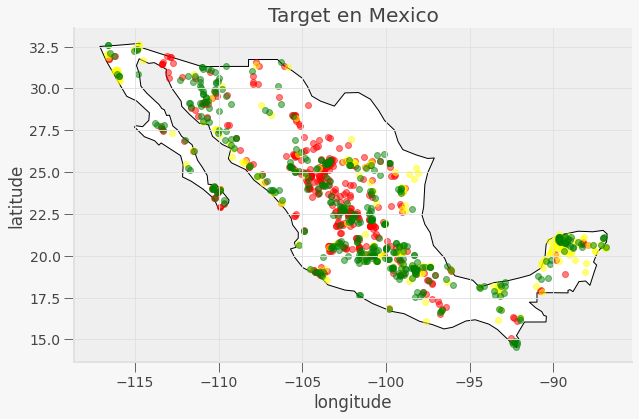

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

print(gax)

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf_red.plot(ax=gax, color='red', alpha = 0.5)

gdf_yel.plot(ax=gax, color='yellow', alpha = 0.5)

gdf_gre.plot(ax=gax, color='green', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

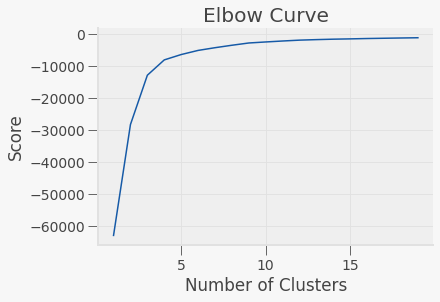

In [ ]:
#Obtenemos numero de cluster optimo
X = latlong

#Curve
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Agrupamiento

In [ ]:
X

,LONGITUD,LATITUD
0,-102.02210,22.20887
1,-102.20075,21.99958
2,-102.28801,22.36685
3,-102.29449,22.18435
4,-110.24480,23.45138
...,...,...
1063,-99.54191,24.76036
1064,-99.70099,24.78280
1065,-99.82249,25.55197
1066,-100.32683,24.80118


In [ ]:
#Clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
y_kmeans

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [ ]:
df["CLUSTER"] = y_kmeans
df["CLUSTER"]

0       3
1       3
2       3
3       3
4       4
       ..
1063    3
1064    3
1065    3
1066    3
1067    3
Name: CLUSTER, Length: 1054, dtype: int32

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")

In [ ]:
gdf_cluster1 = gdf[gdf.CLUSTER == 0]
gdf_cluster2 = gdf[gdf.CLUSTER == 1]
gdf_cluster3 = gdf[gdf.CLUSTER == 2]
gdf_cluster4 = gdf[gdf.CLUSTER == 3]
gdf_cluster5 = gdf[gdf.CLUSTER == 4]

AxesSubplot(0.125,0.125;0.775x0.755)


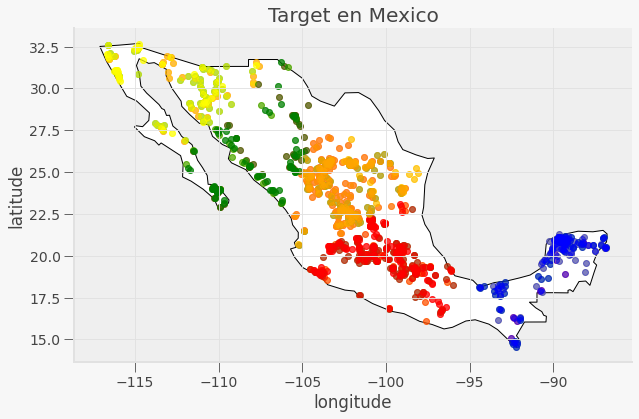

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

print(gax)

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf_red.plot(ax=gax, color='red', alpha = 0.5)

gdf_yel.plot(ax=gax, color='yellow', alpha = 0.5)

gdf_gre.plot(ax=gax, color='green', alpha = 0.5)

gdf_cluster1.plot(ax=gax, color='red', alpha = 0.5)
gdf_cluster2.plot(ax=gax, color='yellow', alpha = 0.5)
gdf_cluster3.plot(ax=gax, color='blue', alpha = 0.5)
gdf_cluster4.plot(ax=gax, color='orange', alpha = 0.5)
gdf_cluster5.plot(ax=gax, color='green', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

# Reto 2

## Seleccion de Variables

In [133]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.metrics import make_scorer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [172]:
#La unica correlacion arriba de .5 con SEMAFORO se obtuvo con CUMPLE_CON_CF, se usaran los modelos de DECISION TREE y RANDOMFOREST para reducir los features.
features = [
  'SDT_M_mg/L',
  'FLUORUROS_mg/L',
  'DUR_mg/L',
  'COLI_FEC_NMP/100_mL',
  'N_NO3_mg/L',
  'AS_TOT_mg/L',
  'CD_TOT_mg/L',
  'CR_TOT_mg/L',
  'HG_TOT_mg/L',
  'PB_TOT_mg/L',
  'MN_TOT_mg/L',
  'FE_TOT_mg/L',
  'SITIO',
  'SUBTIPO',
  'CALIDAD_ALC',
  'CALIDAD_CONDUC',
  'CALIDAD_SDT_ra', 
  'CALIDAD_SDT_salin',
  'CALIDAD_FLUO',
  'CALIDAD_DUR',   
  'CALIDAD_COLI_FEC', 
  'CALIDAD_N_NO3',
  'CALIDAD_AS',
  'CALIDAD_CD',
  'CALIDAD_CR',
  'CALIDAD_HG',
  'CALIDAD_PB',
  'CALIDAD_FE',
  'CALIDAD_MN',
  "CUMPLE_CON_ALC",   
  "CUMPLE_CON_COND",       
  "CUMPLE_CON_SDT_ra",   
  "CUMPLE_CON_SDT_salin",  
  "CUMPLE_CON_FLUO",  
  "CUMPLE_CON_DUR",    
  "CUMPLE_CON_CF",     
  "CUMPLE_CON_NO3",        
  "CUMPLE_CON_AS",     
  "CUMPLE_CON_CD",       
  "CUMPLE_CON_CR",       
  "CUMPLE_CON_HG",       
  "CUMPLE_CON_PB",       
  "CUMPLE_CON_MN",       
  "CUMPLE_CON_FE",
  "ORGANISMO_DE_CUENCA",
  "ESTADO",
  "MUNICIPIO",
  "ACUIFERO"
  ]

X = df[features]
y = df["SEMAFORO"]

## Modelo


In [175]:
# Modelos simples
def get_models():
    models, names = list(), list()

    # técnica y nombre: Árbol de Decisión
    models.append(DecisionTreeClassifier(class_weight='balanced'))
    names.append('DecisionTree')

    # técnica y nombre: Bosque Aleatorio
    models.append(RandomForestClassifier(class_weight='balanced'))
    names.append('RandomForest')

    return models, names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


DecisionTree
Importancia de 
SDT_M_mg/L  :  0.0
FLUORUROS_mg/L  :  0.0
DUR_mg/L  :  0.1754118012520166
COLI_FEC_NMP/100_mL  :  0.02413033911861817
N_NO3_mg/L  :  0.06566494368968896
AS_TOT_mg/L  :  0.10143337842266964
CD_TOT_mg/L  :  0.002822261885218511
CR_TOT_mg/L  :  0.011399447749279921
HG_TOT_mg/L  :  0.0028596428373406
PB_TOT_mg/L  :  0.012176364574951649
MN_TOT_mg/L  :  0.0
FE_TOT_mg/L  :  0.08317360180341467
SITIO  :  0.0
SUBTIPO  :  0.0
CALIDAD_ALC  :  0.0
CALIDAD_CONDUC  :  0.0
CALIDAD_SDT_ra  :  0.0
CALIDAD_SDT_salin  :  0.0
CALIDAD_FLUO  :  0.21117365331117557
CALIDAD_DUR  :  0.0
CALIDAD_COLI_FEC  :  0.001458544942280921
CALIDAD_N_NO3  :  0.06116204766699262
CALIDAD_AS  :  0.0
CALIDAD_CD  :  0.0
CALIDAD_CR  :  0.007267537907063806
CALIDAD_HG  :  0.0
CALIDAD_PB  :  0.0028977714085051407
CALIDAD_FE  :  0.0
CALIDAD_MN  :  0.0
CUMPLE_CON_ALC  :  0.025310166521990404
CUMPLE_CON_COND  :  0.03477276407597055
CUMPLE_CON_SDT_ra  :  0.0
CUMPLE_CON_SDT_salin  :  0.0
CUMPLE_CON_FLUO  :

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


RandomForest
Importancia de 
SDT_M_mg/L  :  0.0343929947821419
FLUORUROS_mg/L  :  0.09132732907555736
DUR_mg/L  :  0.06394911381265839
COLI_FEC_NMP/100_mL  :  0.04849347399396201
N_NO3_mg/L  :  0.04681317235907991
AS_TOT_mg/L  :  0.053187434336933966
CD_TOT_mg/L  :  0.0007395049427490835
CR_TOT_mg/L  :  0.00915540513565487
HG_TOT_mg/L  :  0.0030463267043051405
PB_TOT_mg/L  :  0.006509231380339162
MN_TOT_mg/L  :  0.03190633940083764
FE_TOT_mg/L  :  0.03939151494374027
SITIO  :  0.0067652294719480555
SUBTIPO  :  0.0008392509779270407
CALIDAD_ALC  :  0.003037171987178213
CALIDAD_CONDUC  :  0.005199074786633012
CALIDAD_SDT_ra  :  0.01135418396622512
CALIDAD_SDT_salin  :  0.010498257171400738
CALIDAD_FLUO  :  0.058362346440979845
CALIDAD_DUR  :  0.0499075787088783
CALIDAD_COLI_FEC  :  0.006400118460777709
CALIDAD_N_NO3  :  0.02778664611352117
CALIDAD_AS  :  0.015872586863996504
CALIDAD_CD  :  0.0008313831828689506
CALIDAD_CR  :  0.0056034489079863714
CALIDAD_HG  :  0.00012194773601013507
CA

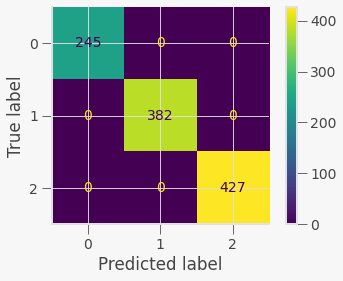

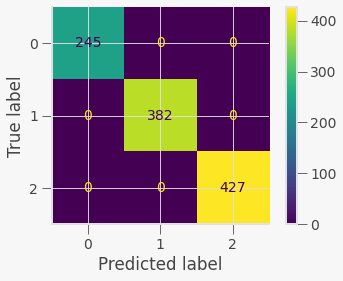

In [173]:
models, names = get_models()

for i in range(len(models)):

    model = models[i]
    model.fit(X, Y)
    
    plot_confusion_matrix(model, X, Y)

    print(names[i])
    print("Importancia de ", )

    importances = model.feature_importances_

    l = len(features)
    fi = 0
    for i in importances:
      print(features[fi], " : ", i)
      fi = fi + 1
    print("-----")

Con la matriz de confusion podemos observar que tenemos un modelo sobreentrenado. Es necesario reducir el numero de variables porque este modelo no se puede generalizar. Ademas, se utiliza el metodo train_test_split y class_weight='balanced' para garantizar una clase balanceada


## Importancia de las variables

In [176]:
best_features = [
  'FLUORUROS_mg/L',
  'COLI_FEC_NMP/100_mL',
  'AS_TOT_mg/L',
  'FE_TOT_mg/L',
  "CUMPLE_CON_NO3",
   "CUMPLE_CON_DUR"
]

X = X[best_features]

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=10)

In [178]:
X_train.describe()

,FLUORUROS_mg/L,COLI_FEC_NMP/100_mL,AS_TOT_mg/L,FE_TOT_mg/L,CUMPLE_CON_NO3,CUMPLE_CON_DUR
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,1.069587,354.590391,0.019595,0.259369,0.924022,0.796648
std,1.681035,2031.344558,0.034410,1.013202,0.265111,0.402717
min,0.200000,1.100000,0.010000,0.025000,0.000000,0.000000
25%,0.271700,1.100000,0.010000,0.025000,1.000000,1.000000
50%,0.502800,1.100000,0.010000,0.047100,1.000000,1.000000
75%,1.157050,15.500000,0.010000,0.179415,1.000000,1.000000
max,21.237500,24196.000000,0.452200,16.437100,1.000000,1.000000


In [179]:
len(X_train)


895

In [180]:
#Amarillo 0, Rojo 1, Verde 2,
y_train.head()

841    0
205    1
427    1
644    2
799    0
Name: SEMAFORO, dtype: int64

In [181]:
len(y_train)

895

## Análisis de resultados con modelo de Decision Trees y Random Forest

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        40
           1       0.94      0.91      0.92        53
           2       0.88      0.92      0.90        66

    accuracy                           0.89       159
   macro avg       0.88      0.88      0.88       159
weighted avg       0.89      0.89      0.89       159



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.89      0.78      0.83        40
           1       0.92      0.91      0.91        53
           2       0.89      0.97      0.93        66

    accuracy                           0.90       159
   macro avg       0.90      0.88      0.89       159
weighted avg       0.90      0.90      0.90       159



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


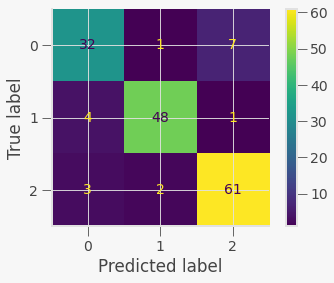

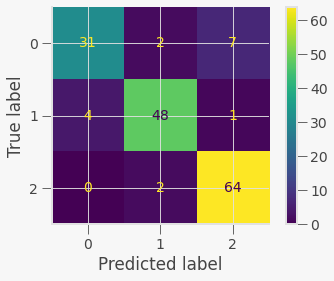

In [182]:
models, names = get_models()

for i in range(len(models)):

  model = models[i]
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test) 

  print(classification_report(y_test, y_pred, labels=[0, 1, 2]))
  plot_confusion_matrix(model, X_test, y_test) 

  #mae_test = mean_absolute_error(y_test, y_test).round(2)
  #print(f"Mean absolute error on test set: {mae_test}")

## Conclusiones

Los resultados fueron los siguientes:
    
*   Se utilizaron los modelos DecisionTreeClassifier y Random Forest para encontrar los mejores features, los resultados mostraron las siguientes columnas con los valores mas altos: COLI_FEC_NMP/100_mL, FLUORUROS_mg/L, AS_TOT_mg/L, FE_TOT_mg/L, CUMPLE_CON_NO3, CUMPLE_CON_DUR

*   El modelo con el accuracy mas alto fue Decision Tree Classifier con .91, mientras que Random Forest obtuvo .89.

* Para el modelo DTC su clase con el accuracy mas alto al fue agua contaminada.

* Ambos modelos tuvieron el mismo numero de errores al clasificar el agua en buen estado.



## Presentación ejecutiva